In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

ModuleNotFoundError: No module named 'pandas'

In [2]:
dataset = pd.read_csv('kendaraan_train.csv')
dataset.head(10)

NameError: name 'pd' is not defined

In [4]:
dataset.shape

(285831, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [6]:
#data cleaning
#remove Na Values
data = dataset.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 171068


In [7]:
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,142794.020729,38.818137,0.997931,26.411334,0.459794,30506.747282,112.260206,154.253063,0.121577
std,82491.716355,15.531695,0.045443,13.262377,0.498382,17090.409733,54.106712,83.862579,0.326798
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71350.750000,25.000000,1.000000,15.000000,0.000000,24369.750000,29.000000,81.000000,0.000000
50%,142768.000000,36.000000,1.000000,28.000000,0.000000,31603.000000,140.000000,154.000000,0.000000
75%,214070.250000,49.000000,1.000000,35.000000,1.000000,39323.250000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
#Data preprocessing
#change data type object to Numeric
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [9]:
#Creating a copy of data
ds = data.copy()
# drop unused label "tertarik"
cols_del = ['Tertarik','id']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [10]:
#Dimentional reduction
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.084918,-0.567753,0.045537,0.496795,1.083923,0.834940,1.008925,-0.144979,0.734473,-0.682703
1,-0.921729,0.591171,0.045537,0.949204,-0.922575,2.566442,-0.991154,-0.275404,-1.538819,0.044680
2,1.084918,1.235018,0.045537,1.627818,-0.922575,-0.896561,1.008925,-1.631139,0.216975,-1.088129
3,-0.921729,-1.147215,0.045537,0.647598,1.083923,0.834940,1.008925,-0.454745,0.734473,0.199696
4,1.084918,-1.211599,0.045537,-1.388242,1.083923,0.834940,1.008925,0.016340,0.882329,-1.469707


In [11]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,171068.0,5.366411e-17,1.586945,-2.572379,-1.768818,0.012035,1.306319,4.866285
col2,171068.0,-6.803546e-17,1.174538,-3.042674,-0.787041,0.104460,0.446830,6.181812
col3,171068.0,-4.901211e-18,1.011627,-2.684264,-0.599997,0.042308,0.615271,25.221256


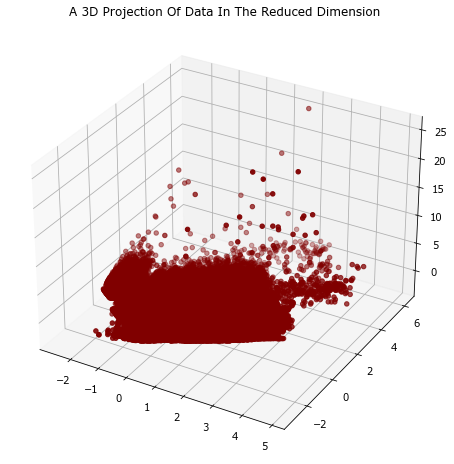

In [12]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [13]:
#Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clus

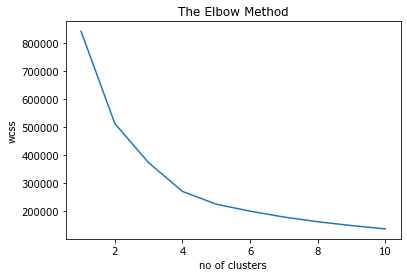

In [14]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(PCA_ds)

In [ ]:
PCA_ds["Clusters"] = y_kmeans
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= y_kmeans

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = data,x=data["Sudah_Asuransi"], y=data["Kendaraan_Rusak"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile berdasarkan Sudah Asuransi dan Kendaraan Rusak")
plt.legend()
plt.show()

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Premi"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Premi"], palette=pal)
plt.show()

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["SIM"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()
